# Insurance claims analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

### Q1.

In [2]:
claims=pd.read_csv('D:\\Learning\\Python Foundation Case Study 3 - Insurance Claims Case Study\\Case Study 3 - Insurance Claims Case Study\\claims.csv')
customer=pd.read_csv('D:\\Learning\\Python Foundation Case Study 3 - Insurance Claims Case Study\\Case Study 3 - Insurance Claims Case Study\\cust_demographics.csv')

In [3]:
claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
customer.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
claims_data= pd.merge(claims, customer, how='outer',left_on='customer_id',right_on='CUST_ID')

In [6]:
claims_data=claims_data.drop(['CUST_ID'],axis=1)

### Q2.

In [7]:
claims_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   customer_id          1100 non-null   float64
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  gender               1092 non-null   object 
 11  DateOfBirth          1092 non-null   object 
 12  State                1092 non-null   object 
 13  Contact              1092 non-null   object 
 14  Segment              1092 non-null   object 
dtypes: float64(3), object(12)
memory usage

In [8]:
claims_data["DateOfBirth"] = pd.to_datetime(claims_data.DateOfBirth, format = "%d-%b-%y")
claims_data.loc[(claims_data.DateOfBirth.dt.year > 2000),"DateOfBirth"]=claims_data[claims_data.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
claims_data["claim_date"] = pd.to_datetime(claims_data.claim_date, format = "%m/%d/%Y")
claims_data["Contact"] = pd.to_numeric(claims_data.Contact.str.replace("-",""),downcast='float')

### Q3.

In [9]:
claims_data.claim_amount=claims_data.claim_amount.str.replace('$','')

In [10]:
claims_data.claim_amount=pd.to_numeric(claims_data.claim_amount)

### Q4.

In [11]:
injury_claims=claims_data[claims_data.claim_type=='Injury only']

In [13]:
injury_claims.loc[:, 'Alert'] = np.where(injury_claims['police_report'] == 'No', 1, 0)

In [14]:
injury_claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Alert
8,24050443.0,21831191.0,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,Male,1977-05-17,NH,4.197129e+09,Gold,1
18,67257404.0,18288638.0,Other driver error,2018-04-24,Auto,Yes,Injury only,32560.0,1.0,No,Female,1969-01-14,MI,3.141351e+09,Platinum,0
21,7809917.0,63916778.0,Other causes,2017-07-22,Auto,No,Injury only,17800.0,1.0,No,Male,1966-09-07,IL,1.461575e+09,Platinum,1
22,29205389.0,17004138.0,Natural causes,2017-06-25,Auto,No,Injury only,31380.0,1.0,No,Female,1965-08-13,WA,4.363545e+09,Silver,1
23,19051665.0,9667764.0,Other causes,2017-12-17,Auto,Yes,Injury only,36190.0,1.0,No,Female,1979-10-10,SC,6.439788e+09,Platinum,0


### Q5.

In [15]:
claims_data = claims_data.groupby('customer_id').first().reset_index()

### Q6.

In [16]:
def missing_imputation(x):
    if x.dtype == 'object':
        x = x.fillna(x.mode()[0])
    else:
        x = x.fillna(x.mean())
    return x
claims_data=claims_data.apply(missing_imputation)

### Q7.

In [17]:
claims_data['Age']=claims_data.claim_date.dt.year-claims_data.DateOfBirth.dt.year  

In [18]:
age_bins = [0, 18, 30, 60, float('inf')]
age_labels = ['Children', 'Youth', 'Adult', 'Senior']

# Categorize customers based on age into the specified criteria
claims_data['Category'] = pd.cut(claims_data['Age'], bins=age_bins, labels=age_labels)
claims_data.groupby(['Category']).count()

,customer_id,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,Age
Category,,,,,,,,,,,,,,,,
Children,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
Youth,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331,331
Adult,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744,744
Senior,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Q8.

In [19]:
claims_data.groupby(['Segment'])['claim_amount'].mean()

Segment
Gold        12675.262946
Platinum    12368.233815
Silver      12267.349306
Name: claim_amount, dtype: float64

### Q9.

In [20]:
round(claims_data[claims_data.claim_date<'2018-09-10'].groupby(['incident_cause'])['claim_amount'].sum(),2)

incident_cause
Crime                  729485.64
Driver error          3292986.73
Natural causes        1315024.04
Other causes          3779918.82
Other driver error    3384078.95
Name: claim_amount, dtype: float64

### Q10.

In [21]:
driver_count=claims_data[(claims_data.incident_cause.str.lower().str.contains('driver'))&(claims_data.State.isin(['TX','DE','AK'])) & (claims_data.Category=='Adult')]

In [22]:
driver_count.groupby(['State'])['State'].count()

State
AK    8
DE    9
TX    6
Name: State, dtype: int64

### Q11.

In [23]:
def round_and_sum(x):
    return round(sum(x), 2)
gender_pie=claims_data.pivot_table(index='gender', columns='Segment',values='claim_amount',aggfunc=round_and_sum)

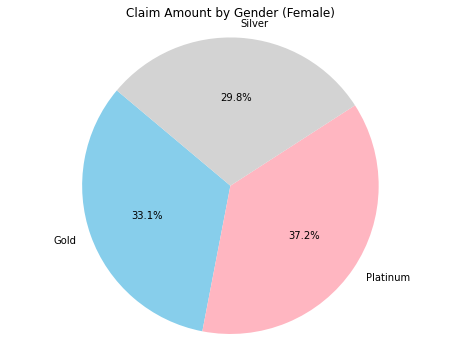

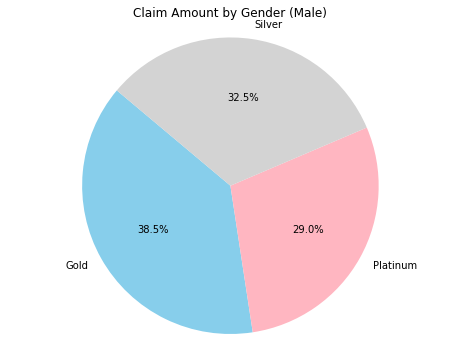

In [24]:
plt.figure(figsize=(8, 6))
labels = gender_pie.columns
colors = ['skyblue', 'lightpink', 'lightgrey']
plt.pie(gender_pie.loc['Female'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title("Claim Amount by Gender (Female)")
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(gender_pie.loc['Male'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title("Claim Amount by Gender (Male)")
plt.show()





### Q12.

In [25]:
a=claims_data[(claims_data.incident_cause.str.lower().str.contains('driver'))].groupby(['gender'])['gender'].count()

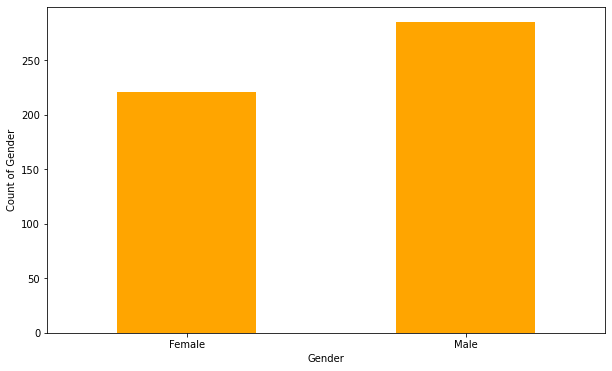

In [26]:
a.plot(kind='bar',figsize=(10,6),color='orange')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.xticks(rotation=0)
plt.show()

### Q13.

In [27]:
fraud=claims_data[claims_data.fraudulent=='Yes'].groupby(['Category'])['total_policy_claims'].sum()
fraud=fraud.drop('Senior')

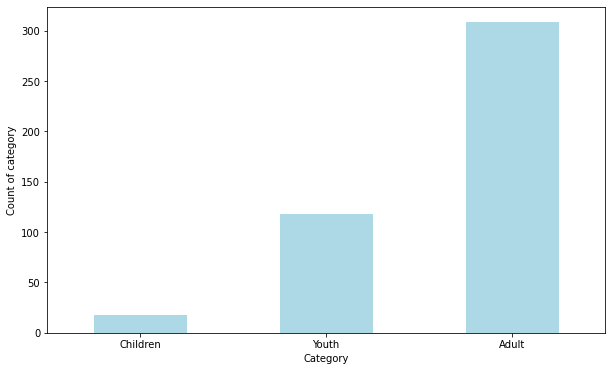

In [28]:
fraud.plot(kind='bar',figsize=(10,6), color='lightblue')
plt.xlabel('Category')
plt.ylabel('Count of category')
plt.xticks(rotation=0)
plt.show()

### Q14.

In [29]:
claims_data['month'] = claims_data['claim_date'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
claims_data['month'] = pd.Categorical(claims_data['month'], categories=month_order, ordered=True)

In [30]:
monthly_claim_amount=round(claims_data.groupby(['month'])['claim_amount'].sum(),2)

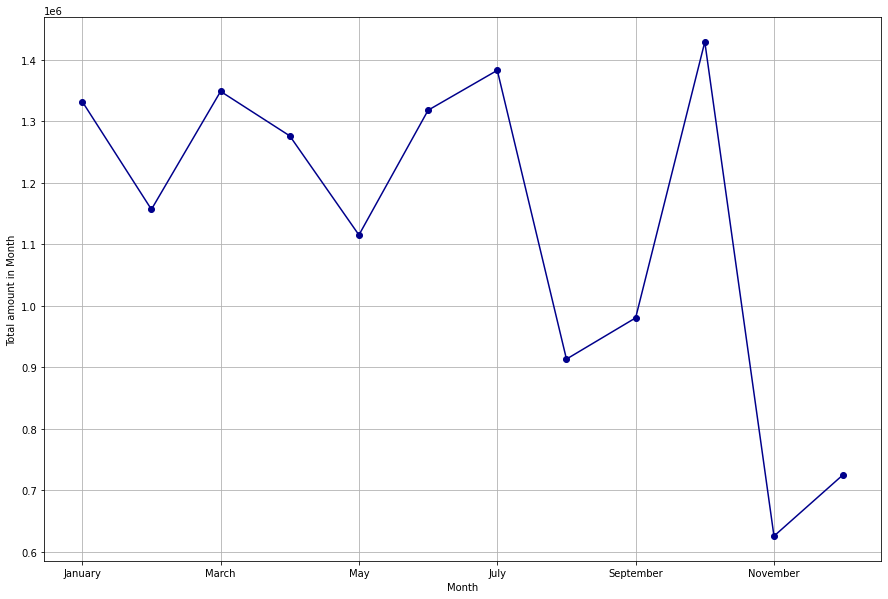

In [31]:
monthly_claim_amount.plot(kind='line',figsize=(15,10),color='darkblue',marker='o')
plt.xlabel('Month')
plt.ylabel('Total amount in Month')
plt.grid(True)
plt.show()

### Q15.

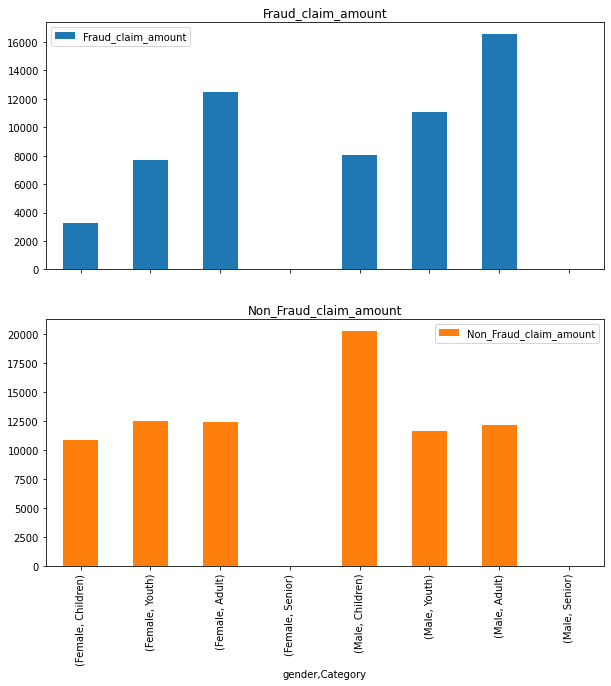

In [32]:
Frauds_amount_gender= pd.DataFrame(claims_data.loc[(claims_data.fraudulent=="Yes")].groupby(["gender","Category"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(claims_data.loc[(claims_data.fraudulent=="No")].groupby(["gender","Category"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","Category"]),2)

Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()



In [33]:
import scipy.stats as stats

### Q16.

In [34]:
claims_male=claims_data.loc[claims_data.gender=='Male','claim_amount']
claims_female=claims_data.loc[claims_data.gender=='Female','claim_amount']

In [35]:
print('Average claim by males: ' , round(claims_male.mean(),2))
print('Average claim by females: ', round(claims_female.mean(),2))

Average claim by males:  12765.03
Average claim by females:  12100.72


In [36]:
# Ho : u1=u2
# Ha : u1 <> u2
# p_value : 0.05
# CI : 95%

In [37]:
stats.ttest_ind(claims_male, claims_female)

TtestResult(statistic=0.821612848932144, pvalue=0.4114767802889234, df=1091.0)

In [38]:
print(''' As the p value is greater than 0.05, we fail to reject null hypothesis, 
thus the amount claimed by males & females have some similarity. ''')


 As the p value is greater than 0.05, we fail to reject null hypothesis, 
thus the amount claimed by males & females have some similarity. 


### Q17.

In [39]:
observation=pd.crosstab(index=claims_data.Segment, columns=claims_data.Category)

In [40]:
observation

Category,Children,Youth,Adult
Segment,,,
Gold,7,110,269
Platinum,6,117,238
Silver,5,104,237


In [41]:
# Ho : There is no relationship between Category and segment
# Ha : There is a relationship
# p-value : 0.05

In [42]:
stats.chi2_contingency(observation)

Chi2ContingencyResult(statistic=1.5038476231549371, pvalue=0.8259596912830427, dof=4, expected_freq=array([[  6.3568161 , 116.894785  , 262.7483989 ],
       [  5.94510522, 109.32387923, 245.73101555],
       [  5.69807868, 104.78133577, 235.52058554]]))

In [43]:
print('''We fail to reject null hypothesis, since is the p-value comes out greater than 0.05
therefore we can conclude there is no relation between category and segment''')

We fail to reject null hypothesis, since is the p-value comes out greater than 0.05
therefore we can conclude there is no relation between category and segment


### Q18.

In [44]:
claims_data['year']=claims_data.claim_date.dt.year

In [45]:
current_year_data = claims_data.loc[claims_data['year'] == 2018,'claim_amount']

#fiscal_average=$10000

# Ho : u <= 10000
# Ha : u > 10000
# CI : 95%
# p-value : 0.05


In [46]:
stats.ttest_1samp(current_year_data,10000)

TtestResult(statistic=4.308914037117706, pvalue=1.985741363740185e-05, df=487)

In [47]:
current_year_data.mean()

12623.533243366079

In [48]:
print(''' We reject null hypothesis, as the current year shows significant rise than fiscal year''')

 We reject null hypothesis, as the current year shows significant rise than fiscal year


### Q19.

In [50]:
claims_data.Category.value_counts()

Category
Adult       744
Youth       331
Children     18
Senior        0
Name: count, dtype: int64

In [51]:
Adult=claims_data.loc[claims_data.Category=='Adult','total_policy_claims']
Youth=claims_data.loc[claims_data.Category=='Youth','total_policy_claims']
Children=claims_data.loc[claims_data.Category=='Children','total_policy_claims']

In [52]:
print('Mean of Adult: ', Adult.mean(), '| Mean of Youth: ', Youth.mean(), '| Mean of Children:', Children.mean())

Mean of Adult:  1.5721748130938553 | Mean of Youth:  1.589651103430384 | Mean of Children: 2.1666666666666665


In [53]:
# Ho : u1 = u2 = u3
# Ha : u1 <> u2 <> u3
# p-value : 0.05

In [54]:
stats.f_oneway(Adult,Youth, Children)

F_onewayResult(statistic=2.418526730595248, pvalue=0.08953047134640661)

In [55]:
print('''We fail to reject null hypothesis,since p-value >0.05,
thus there is no difference bewteeen age category and insurance claims''')

We fail to reject null hypothesis,since p-value >0.05,
thus there is no difference bewteeen age category and insurance claims


### Q20.

In [ ]:
# Is there any relationship between total number of policy claims and the
# claimed amount?

In [ ]:
# Ho : r=0
# Ha : r<>0
# CI : 95%
# p-vlaue: 0.05

In [56]:
stats.pearsonr(claims_data.claim_amount, claims_data.total_policy_claims)

PearsonRResult(statistic=-0.016409477672452967, pvalue=0.5878721766392909)

In [58]:
print('''Since p-value>0.05, we fail to reject null hypothesis, there is no relation between claim amount and total
no. of policy claims''')

Since p-value>0.05, we fail to reject null hypothesis, there is no relation between claim amount and total
no. of policy claims
